In [3]:
### soc-sign-bitcoinotc_v2.csv is modified version of data with UTC timestamp (in string)

In [1]:
from utils import *
import numpy as np
import pandas as pd
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle
import qgrid

import ipywidgets as wg
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
!head -n 5 soc-sign-bitcoinotc_v2.csv

#source,#target,#rating,#timestamp
6,2,4,2010-11-08 18:45:11
6,5,2,2010-11-08 18:45:41
1,15,1,2010-11-08 19:05:40
4,3,7,2010-11-08 19:41:17


In [3]:
## Is it a multiDiGraph?

G = nx.read_edgelist('soc-sign-bitcoinotc_v2.csv', delimiter=',', nodetype=int,
                     data = (('rating', int), ('time', str)), 
                     create_using=nx.MultiDiGraph)

"""
The maximum number of edges between two nodes is 1, hence the graph is a DiGraph
"""
Counter(G.edges()).most_common(2) 

[((6, 2), 1), ((6, 5), 1)]

In [4]:
G = nx.read_edgelist('soc-sign-bitcoinotc_v2.csv', delimiter=',', nodetype=int,
                     data = (('rating', int), ('time', str)), 
                     create_using=nx.DiGraph)

In [5]:
print("Number of users: ", nx.number_of_nodes(G))
print('Number of ratings', nx.number_of_edges(G))

Number of users:  5881
Number of ratings 35592


### Plotting a sub graph

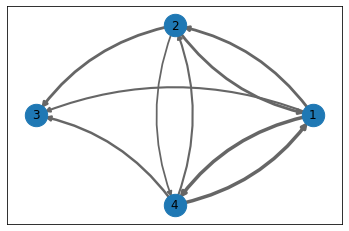

In [6]:
G_sub = nx.subgraph(G, [1,2,3,4])
pos = nx.circular_layout(G_sub)
edge_label = nx.get_edge_attributes(G_sub,'rating')
edge_weight = [0.35*G_sub[u][v]['rating'] for u,v in G_sub.edges()]
nx.draw_networkx_nodes(G_sub, pos, node_size=500)
nx.draw_networkx_labels(G_sub, pos)
_ = nx.draw_networkx_edges(G_sub, pos, connectionstyle='arc3, rad = 0.2', width=edge_weight, edge_color='.4', label=edge_label)
#_ = nx.draw_networkx_edges(G_sub, pos, edge_labels = edge_label, font_size=8)


### Degree centrality distribution
- Most of the users have made fewer transaction and half of the users with less than or equal to 4 transcation
- The out degree and in degree distribution follows similer distribution with around 30 percent of users with omly one transaction

In [7]:
G = nx.read_gexf('bitcoin_users_v1.gexf')

80 percent of users have rated less than 5 users
80 percent of users have received less than 6 users


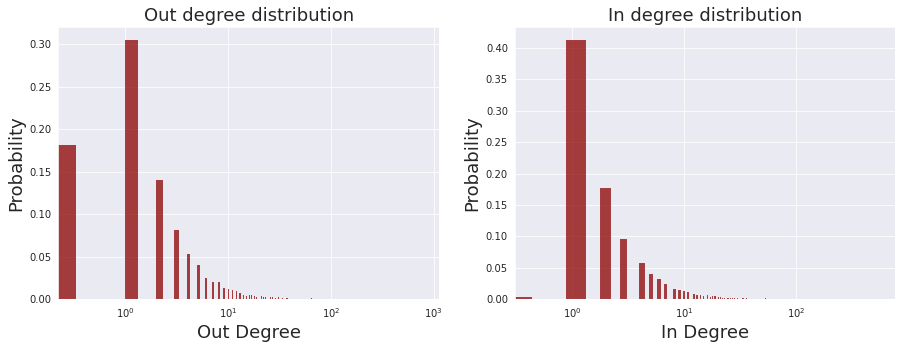

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.set_style("darkgrid")
out_degree = dict(G.out_degree())
out_deg_scores = sort_dict(out_degree, values=True)
print(f'80 percent of users have rated less than {int(np.percentile(out_deg_scores, 80))} users')
plot_hist(out_deg_scores, x_scale='log', ax=ax[0])
ax[0].set_xlabel('Out Degree', fontsize=18)
ax[0].set_ylabel('Probability', fontsize=18)
_=ax[0].set_title('Out degree distribution', fontsize=18)

in_degree = dict(G.in_degree())
in_deg_scores = sort_dict(in_degree, values=True)
print(f'80 percent of users have received less than {int(np.percentile(in_deg_scores, 80))} users')
plot_hist(in_deg_scores, x_scale='log', ax=ax[1])
ax[1].set_xlabel('In Degree', fontsize=18)
ax[1].set_ylabel('Probability', fontsize=18)
_=ax[1].set_title('In degree distribution', fontsize=18)

- 20 percent of users constitute around 80 percent of rating in the network.

0.0


Text(0.5, 1.0, 'Cumulative distribution of number of ratings')

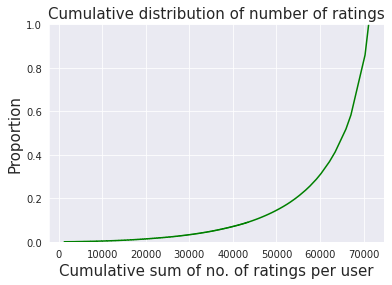

In [26]:
cum_sum_out_deg = np.cumsum(deg_scores)
cum_sum_out_deg = cum_sum_out_deg[cum_sum_out_deg>0]
ax = sns.ecdfplot(cum_sum_out_deg, color='green')
print(np.mean(np.array(deg_scores)==0))
ax.set_xlabel('Cumulative sum of no. of ratings per user', fontsize=15)
ax.set_ylabel('Proportion', fontsize=15)
ax.set_title('Cumulative distribution of number of ratings', fontsize=15)

In [20]:
print(f'80 percent of users have received less than {int(np.percentile(deg_scores, 85))} ratings')

80 percent of users have received less than 8 ratings


In [25]:
print(f'55 percent of users have received less than {int(np.percentile(in_deg_scores, 55))} ratings')


55 percent of users have received less than 2 ratings


### 20 percent of users consitute 80 percent of ratings
### 18 percent of users never rated any other users

0.1814317292977385


Text(0.5, 1.0, 'Cumulative distribution of number of ratings')

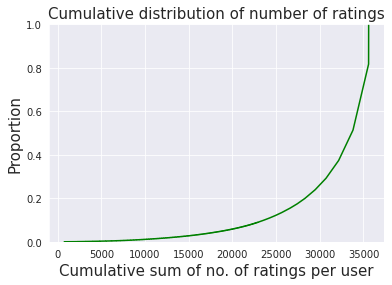

In [24]:
cum_sum_out_deg = np.cumsum(out_deg_scores)
cum_sum_out_deg = cum_sum_out_deg[cum_sum_out_deg>0]
ax = sns.ecdfplot(cum_sum_out_deg, color='green')
print(np.mean(np.array(out_deg_scores)==0))
ax.set_xlabel('Cumulative sum of no. of ratings per user', fontsize=15)
ax.set_ylabel('Proportion', fontsize=15)
ax.set_title('Cumulative distribution of number of ratings', fontsize=15)

### Rating distribution
- Half of the rating are less than or equal to 1
- Less than 10 percent of ratings are greater than equal to 4

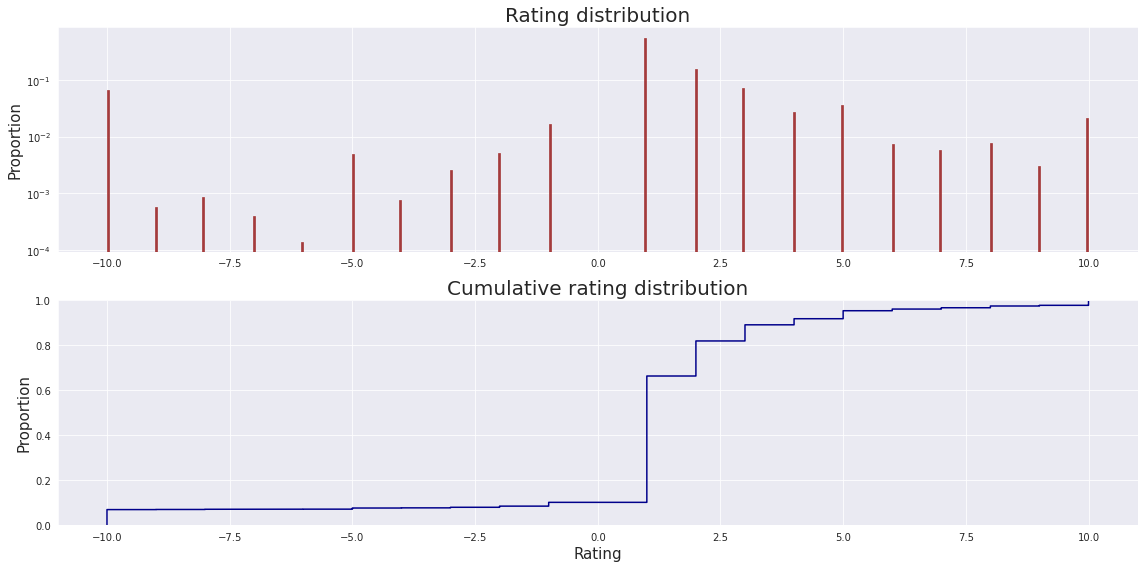

In [38]:
fig, axes = plt.subplots(2,1, figsize=(16,8))
ratings = [G.get_edge_data(*edge)['rating'] for edge in G.edges()]
plot_hist(ratings, fig_size=(10,8), y_scale='log', ax=axes[0])

sns.ecdfplot(ratings, ax=axes[1], color='darkblue')
_ = axes[1].set_xlabel('Rating')

axes[0].set_ylabel('Proportion', fontsize=15)
#axes[0].set_xlabel('Rating', fontsize=15)
axes[1].set_ylabel('Proportion', fontsize=15)
axes[1].set_title('Cumulative rating distribution', fontsize=20)
axes[0].set_title('Rating distribution', fontsize=20)
axes[1].set_xlabel('Rating', fontsize=15)
fig.tight_layout()


### Around 80 percent of users are part of strongly connected component

In [11]:
scc = [node_set for node_set in nx.strongly_connected_components(G)]
scc_count = [len(node_set) for node_set in scc]
scc_node_counter = Counter(scc_count).most_common(5)

print('The number of nodes in largest component is ', scc_node_counter[-1][0])

The number of nodes in largest component is  4709


In [40]:
in_deg = [deg for node, deg in dict(G.in_degree()).items()]
out_deg = [deg for node, deg in dict(G.out_degree()).items()]

#### There is a positive correlation between number of users rated by the user and number of ratings received by him.

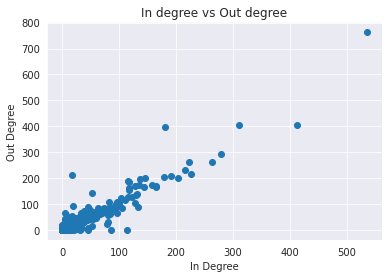

In [41]:
plt.scatter(in_deg, out_deg)
plt.title('In degree vs Out degree')
plt.xlabel('In Degree')
_ = plt.ylabel('Out Degree')

### Average rate over a seven day window

Text(0, 0.5, 'Average rating over 7 days window')

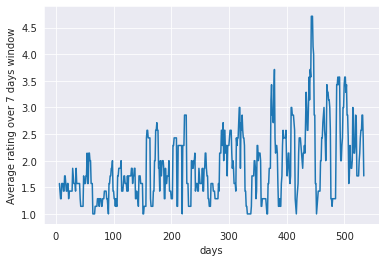

In [36]:
in_ , out_ = get_ratings(G, '35', True)
in_ = sorted(in_, key=lambda x:x[1]['time'] )
in_rating = [x[1]['rating'] for x in in_]
plt.plot(pd.Series(in_rating).rolling(window=7).mean())
plt.xlabel('days')
plt.ylabel('Average rating over 7 days window')
#sort_dict(dict(G.degree()))

### Network Analysis based on time stamp

- #### There is a positive correlation between number of transaction and number of users added to the network over time between 2012 to 2014.
- #### The number of transaction saw a spike in the mid of 2011 and 2012 , so does the number of users

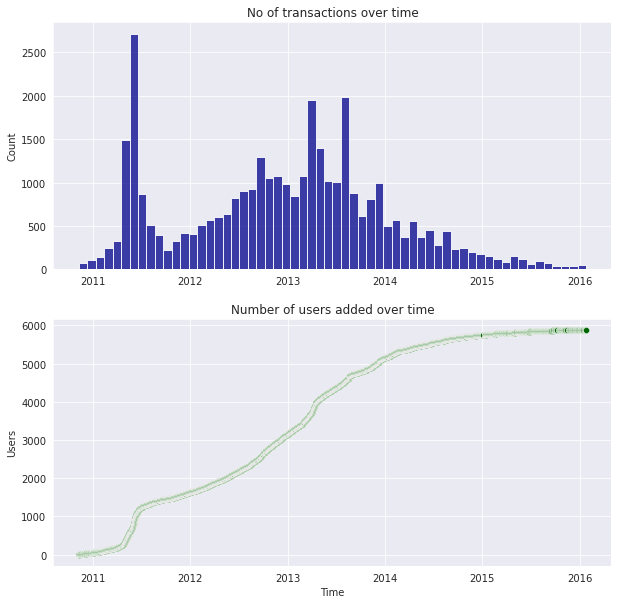

In [19]:
fig, axes = plt.subplots(2,1, figsize=(10,10))
edges = [(node1, node2, str_to_date(attr['time'])) for node1, node2, attr in G.edges(data=True)]
edges_sort_by_time = sorted(edges, key=lambda x: x[2])
time_stamps = [x[2] for x in edges_sort_by_time]
ax = sns.histplot(time_stamps, color='darkblue', ax=axes[0])
_ = ax.set_title('No of transactions over time')

nodes = set()
nodes_over_time = []
for node1 , node2, time in edges_sort_by_time:
    nodes.update((node1, node2))
    nodes_over_time.append((time, len(nodes)))
time, num_users = zip(*nodes_over_time)
ax = sns.scatterplot(time, num_users, color='darkgreen', ax=axes[1])
ax.set_title('Number of users added over time')
ax.set_xlabel('Time')
_ = ax.set_ylabel('Users')
#sns.ecdfplot(time_stamps)

#### Communities detection is based on  Girvan–Newman algorithm. 
- The comminities were detected using giphi tool and save into csv file.

In [12]:
G = nx.read_edgelist('soc-sign-bitcoinotc_v2.csv', delimiter=',', nodetype=int,
                     data = (('rating', int), ('time', str)), 
                     create_using=nx.DiGraph)
community_nodes = read_community('community.csv', G)
community_stats = pd.concat([attr for attr in community_nodes], axis=1).T.reset_index()
qgrid.show_grid(community_stats, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### In degree distribution within communities

In [13]:
df = pd.read_csv('community.csv')
community_nodes = df.groupby(['modularity_class'])['Id'].apply(list)

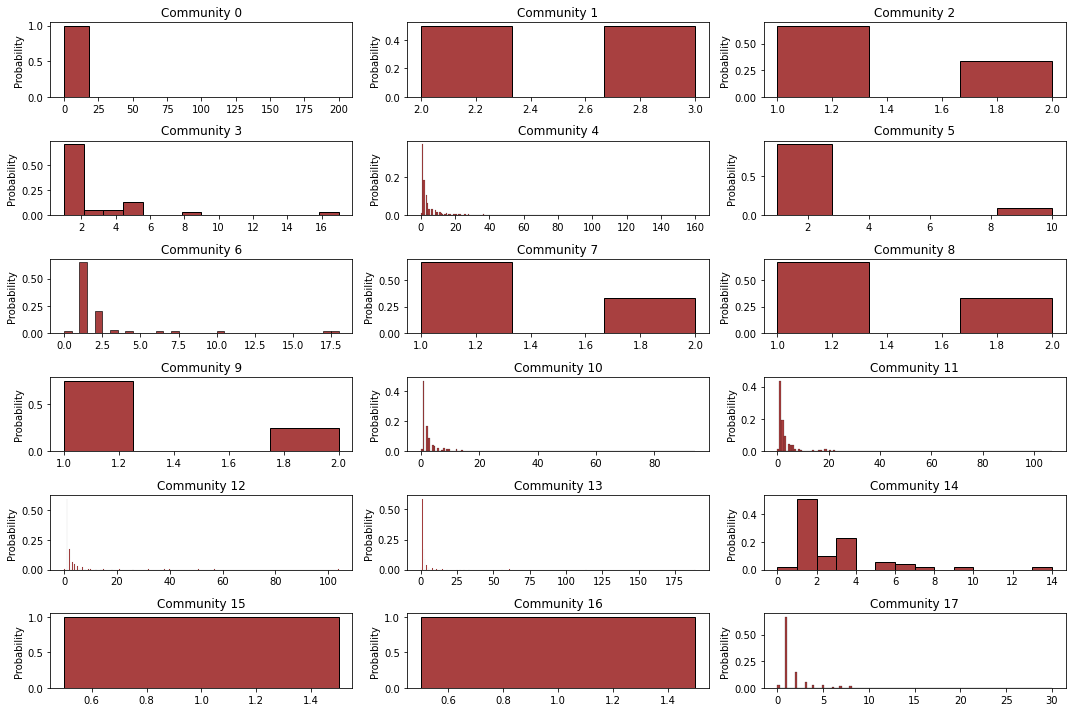

In [14]:
community_nodes = df.groupby(['modularity_class'])['Id'].apply(list)

fig, ax = plt.subplots(6, 3, figsize=(15,10))
def plot_degree_dist(G, ax, ind):
    in_degree = dict(G.in_degree())
    in_deg_scores = sort_dict(in_degree, values=True)
    plot_hist(in_deg_scores, x_scale='linear', ax=ax)
    ax.set_title(f'Community {ind}')

ind = 0
    
for i in range(6):
    for j in range(3):
        plot_degree_dist(G.subgraph(community_nodes[ind]), ax=ax[i][j], ind=ind)
        ind+=1
fig.tight_layout()
plt.show()

### Rating distribution within communities

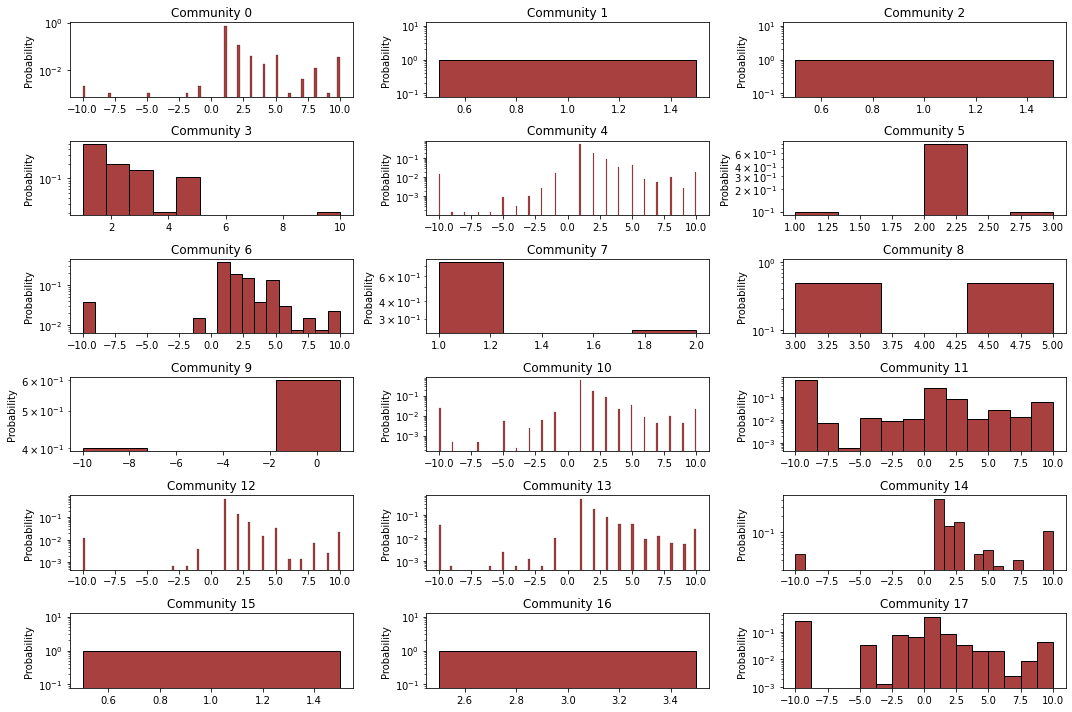

In [15]:
fig, ax = plt.subplots(6, 3, figsize=(15,10))


ind = 0
    
for i in range(6):
    for j in range(3):
        G_sub = G.subgraph(community_nodes[ind])
        ratings = [G_sub.get_edge_data(*edge)['rating'] for edge in G_sub.edges()]
        plot_hist(ratings, y_scale='log', ax=ax[i][j])
        (ax[i][j]).set_title(f'Community {ind}')
        ind+=1
fig.tight_layout()
plt.show()

In [16]:
for node in G.nodes():
    in_rating, out_rating = get_ratings(G, node)
    if all(edge_attr[1]['rating'] >= 0 for edge_attr in in_rating):
        G.nodes[node]['in_dist'] = 1
    elif all(edge_attr[1]['rating'] < 0 for edge_attr in in_rating):
        G.nodes[node]['in_dist'] = -1
    else:
        G.nodes[node]['in_dist'] = 0
    
    if all(edge_attr[1]['rating'] >= 0 for edge_attr in out_rating):
        G.nodes[node]['out_dist'] = 1
    elif all(edge_attr[1]['rating'] < 0 for edge_attr in out_rating):
        G.nodes[node]['out_dist'] = -1
    else:
        G.nodes[node]['out_dist'] = 0
    
    G.nodes[node]['num_in'] = len(in_rating)
    G.nodes[node]['num_out'] = len(out_rating)

In [17]:
nodes_in_pos = [x for x,y in G.nodes(data=True) if ((y['in_dist']==1) & (y['num_in']>=5))]
nodes_in_neg = [x for x,y in G.nodes(data=True) if ((y['in_dist']==-1) & (y['num_in'] >=5))]
nodes_in_mix = [x for x,y in G.nodes(data=True) if ((y['in_dist'])==0 & (y['num_in'] >=5))]

nodes_out_pos = [x for x,y in G.nodes(data=True) if ((y['out_dist']==1) & (y['num_out']>=5))]
nodes_out_neg = [x for x,y in G.nodes(data=True) if ((y['out_dist']==-1) & (y['num_out']>=5))]
nodes_out_mix = [x for x,y in G.nodes(data=True) if ((y['out_dist']==0) & (y['num_out']>=5))]

print('Number of nodes with all positive in ratings: ', len(nodes_in_pos))
print('Number of nodes with all negetive in ratings: ', len(nodes_in_neg))
print('Number of nodes with mix of in ratings: ', len(nodes_in_mix))

print('\n')

print('Number of nodes with all positive out ratings: ', len(nodes_out_pos))
print('Number of nodes with all negetive out ratings: ', len(nodes_out_neg))
print('Number of nodes with mix of out ratings: ', len(nodes_out_mix))

Number of nodes with all positive in ratings:  848
Number of nodes with all negetive in ratings:  20
Number of nodes with mix of in ratings:  893


Number of nodes with all positive out ratings:  851
Number of nodes with all negetive out ratings:  13
Number of nodes with mix of out ratings:  546


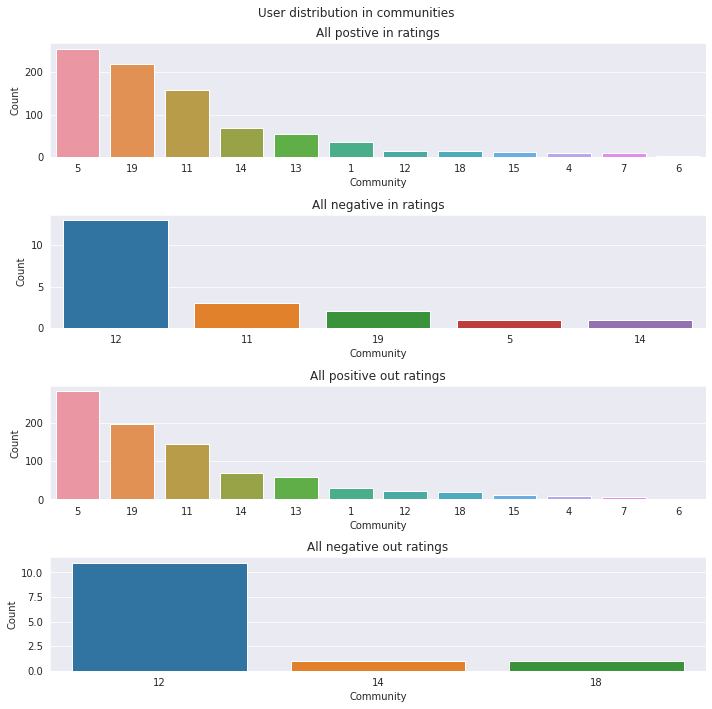

In [18]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(4,1, figsize=(10,10), )
fig.suptitle('User distribution in communities')
plot_community_distrubution(community_nodes, nodes_in_pos, ax=ax[0])
ax[0].set_title('All postive in ratings')
plot_community_distrubution(community_nodes, nodes_in_neg, ax=ax[1])
ax[1].set_title('All negative in ratings')
plot_community_distrubution(community_nodes, nodes_out_pos, ax=ax[2])
ax[2].set_title('All positive out ratings')
plot_community_distrubution(community_nodes, nodes_out_neg, ax=ax[3])
ax[3].set_title('All negative out ratings')
fig.tight_layout()

In [22]:
connected_components = list(nx.connected_components(G.to_undirected()))
component_1 = G.subgraph(connected_components[0])

In [23]:
bc = sort_dict(nx.betweenness_centrality(component_1))
pg = sort_dict(nx.pagerank(component_1))
cl = sort_dict(nx.closeness_centrality(component_1))
cc = sort_dict(nx.clustering(component_1))

In [27]:
def num_days_spent(edges):
    return len(set([str_to_date(x[2]['time']).date() for x in edges]))

In [28]:
pg_scores = []
num_days = []
for node in pg:
    pg_scores.append(pg[node])
    num_days.append(num_days_spent(G.in_edges(node, data=True)))

<AxesSubplot:>

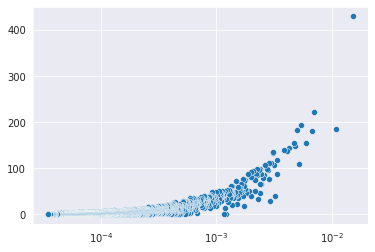

In [29]:
fig, ax = plt.subplots()

# Set the scale of the x-and y-axes
ax.set(xscale="log", yscale="linear")
sns.scatterplot(pg_scores, num_days, ax=ax)

In [30]:
nodes = []
bc_mix = []
pg_mix = []
cl_mix = []
cc_mix = []
num_days_mix = []
neg_rating_percent = []
ones_proportion = []
num_transactions_in = []
num_transactions_out = []
node_data = component_1.nodes(data=True)
for node in component_1.nodes():
    nodes.append(node)
    ones_proportion.append(ones_percent(component_1, node))
    bc_mix.append(bc[node])
    pg_mix.append(pg[node])
    cl_mix.append(cl[node])
    num_days_mix.append(num_days_spent(component_1.in_edges(node, data=True)))
    neg_rating_percent.append(get_neg_rating_ratio(component_1, node))
    cc_mix.append(cc[node])
    num_transactions_in.append(node_data[node]['num_in'])
    num_transactions_out.append(node_data[node]['num_out'])
    

In [31]:
df_centrality = pd.DataFrame(np.array([nodes,bc_mix, pg_mix, cl_mix, num_days_mix, neg_rating_percent, ones_proportion, cc_mix, num_transactions_in, num_transactions_out]).T,
                         columns=['node','betweeness','page_rank','closeness','num_days_appeared','neg_rating_percent','ones_rating_percent','clustering_coeff', 'num_ratings_received', 'num_ratings_given'])

### Comparing centrality measure betwwen users who have received less than 50 percent of negative rating and users who have received more than 50 percent of negative rating
- Only who have received more than one five ratings are considered

In [46]:
df1 = df_centrality[(df_centrality.num_ratings_given>1) | (df_centrality.num_ratings_received>1)]
df_neg = df1[(df1.num_ratings_received>=5) & (df1.neg_rating_percent>=0.5)]
df_pos = df1[(df1.num_ratings_received>=5) & (df1.neg_rating_percent<0.5)]

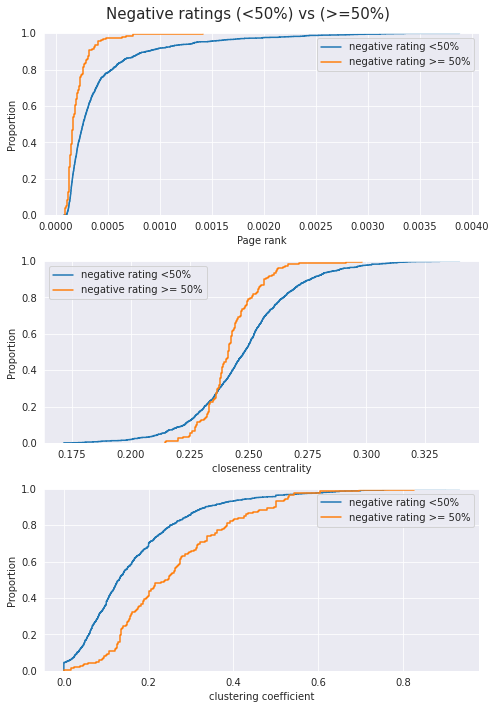

In [47]:
fig, ax = plt.subplots(3,1, figsize=(7,10))
ax[0].set(xscale='linear', yscale="linear")
sns.ecdfplot(x='page_rank', data=df_pos[df_pos.page_rank<0.004], ax=ax[0], label='negative rating <50%')
sns.ecdfplot(x='page_rank', data=df_neg, ax=ax[0], label='negative rating >= 50%')
ax[0].legend()
ax[0].set_xlabel('Page rank')

sns.ecdfplot(x='closeness', data=df_pos, ax=ax[1], label='negative rating <50%')
sns.ecdfplot(x='closeness', data=df_neg, ax=ax[1], label='negative rating >= 50%')
ax[1].legend()
ax[1].set_xlabel('closeness centrality')

sns.ecdfplot(x='clustering_coeff', data=df_pos, ax=ax[2], label='negative rating <50%')
sns.ecdfplot(x='clustering_coeff', data=df_neg, ax=ax[2], label='negative rating >= 50%')
ax[2].set_xlabel('clustering coefficient')
ax[2].legend()

fig.suptitle('Negative ratings (<50%) vs (>=50%)', fontsize=15)
fig.tight_layout()


<AxesSubplot:xlabel='ones_rating_percent', ylabel='Proportion'>

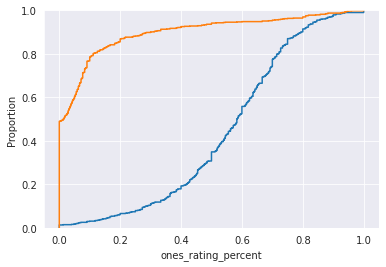

In [48]:
temp = df_centrality[df_centrality.num_ratings_received>=10]
sns.ecdfplot(x='ones_rating_percent', data=temp)
sns.ecdfplot(x='neg_rating_percent', data=temp)